## Students Performance in Exams

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### importing dataset

In [4]:
df=pd.read_csv('data/StudentsPerformance.csv')

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.shape

(1000, 8)

### Data checks to perform
#### checking missing values
#### check duplicates
#### check data types
#### check no. of unique values of each columns
#### check statistics of data
#### check various categories present in categorical columns

In [7]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [11]:
#checking statistics
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [12]:
# various categories 
print("categories in 'gender' variable : ",df['gender'].unique())
print("categories in 'race/ethnicity' : ",df['race/ethnicity'].unique())
print("categories in 'parental level of education' : ",df['parental level of education'].unique())
print("categories in 'lunch' : ",df['lunch'].unique())
print("categories in 'test preparation course' : ",df['test preparation course'].unique())

categories in 'gender' variable :  ['female' 'male']
categories in 'race/ethnicity' :  ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental level of education' :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'lunch' :  ['standard' 'free/reduced']
categories in 'test preparation course' :  ['none' 'completed']


In [13]:
#numerical and categorical features
num_feature=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_feature=[feature for feature in df.columns if df[feature].dtype=='O']

print("we have {} numerical features : {}".format(len(num_feature),num_feature))
print("we have {} cstegoricl features : {}".format(len(categorical_feature),categorical_feature))


we have 3 numerical features : ['math score', 'reading score', 'writing score']
we have 5 cstegoricl features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


## Adding columns for "total score" and "Average"

In [14]:
df["total score"]=df["math score"]+df["reading score"]+df["writing score"]
df["average score"]=df["total score"]/3

In [15]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [16]:
math_full_score=df[df['math score']==100]['average score'].count()
reading_full_score=len(df[df['reading score']==100])   #another method
writing_full_score=len(df[df['writing score']==100])

print(f"No. of student with full marks in math :{math_full_score}")
print(f"No. of student with full marks in reading :{reading_full_score}")
print(f"No. of student with full marks in writing :{writing_full_score}")

No. of student with full marks in math :7
No. of student with full marks in reading :17
No. of student with full marks in writing :14


In [17]:
math_less_20=len(df[df['math score']<=20])
reading_less_20=len(df[df['reading score']<=20])
writing_less_20=len(df[df['writing score']<=20])

print(f"No. of student with less than 20 marks in math :{math_less_20}")
print(f"No. of student with less than 20 marks in reading :{reading_less_20}")
print(f"No. of student with less than 20 marks in writing :{writing_less_20}")

No. of student with less than 20 marks in math :4
No. of student with less than 20 marks in reading :1
No. of student with less than 20 marks in writing :3


## Exploring Data(Visualization)

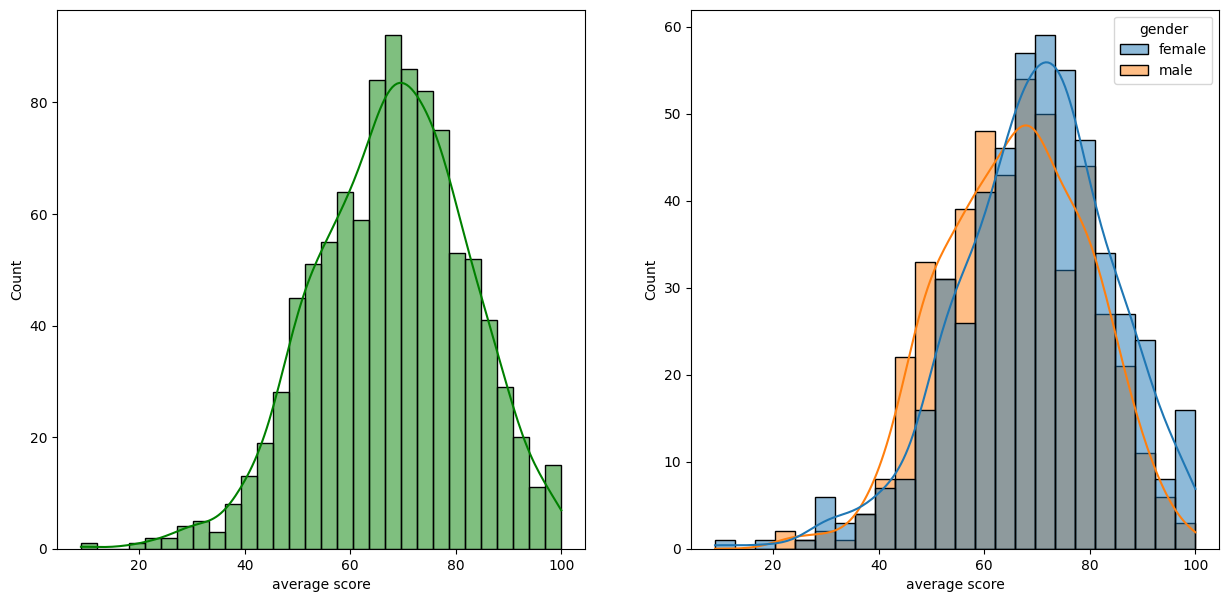

In [18]:
#with respect to average score
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x=df['average score'],bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x=df['average score'],hue=df['gender'],kde=True)
plt.show()

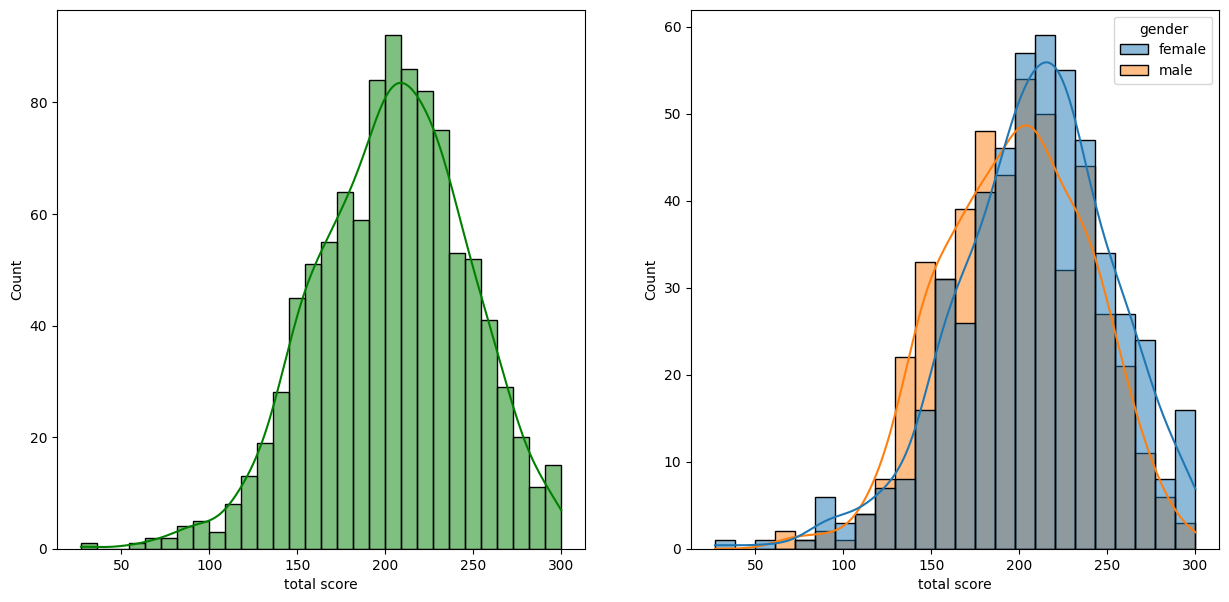

In [19]:
#with respect to total score
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x=df['total score'],bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x=df['total score'],hue=df['gender'],kde=True)
plt.show()

### Insights
#### Female students are performing well as compared to male students

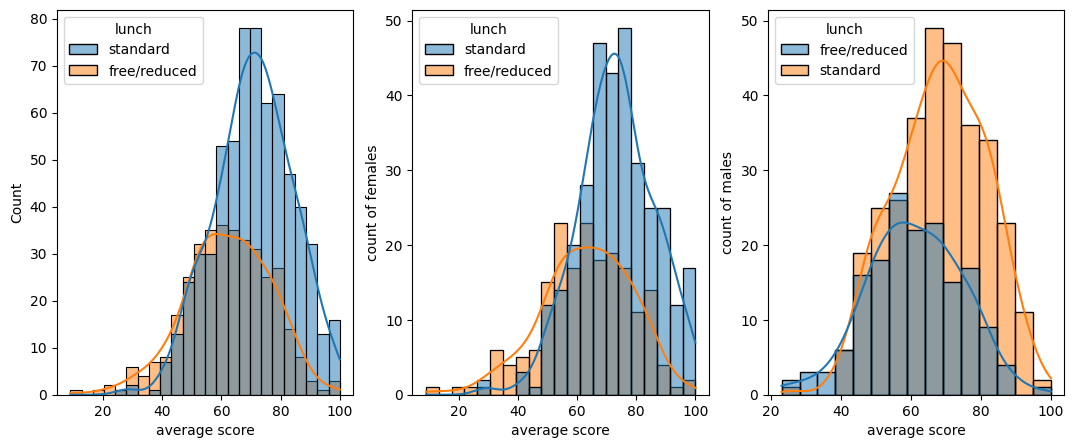

In [20]:
## on the basis of lunch
plt.figure(figsize=(13,5))
plt.subplot(1,3,1)
sns.histplot(data=df,x=df['average score'],kde=True,hue='lunch')
plt.subplot(1,3,2)
sns.histplot(data=df[df.gender=='female'],x='average score',kde=True,hue='lunch')
plt.ylabel("count of females")
plt.subplot(1,3,3)
sns.histplot(data=df[df.gender=='male'],x='average score',kde=True,hue='lunch')
plt.ylabel("count of males")
plt.show()

### Insights
#### student with standard lunch perform well both male or female

Text(0, 0.5, 'count of females')

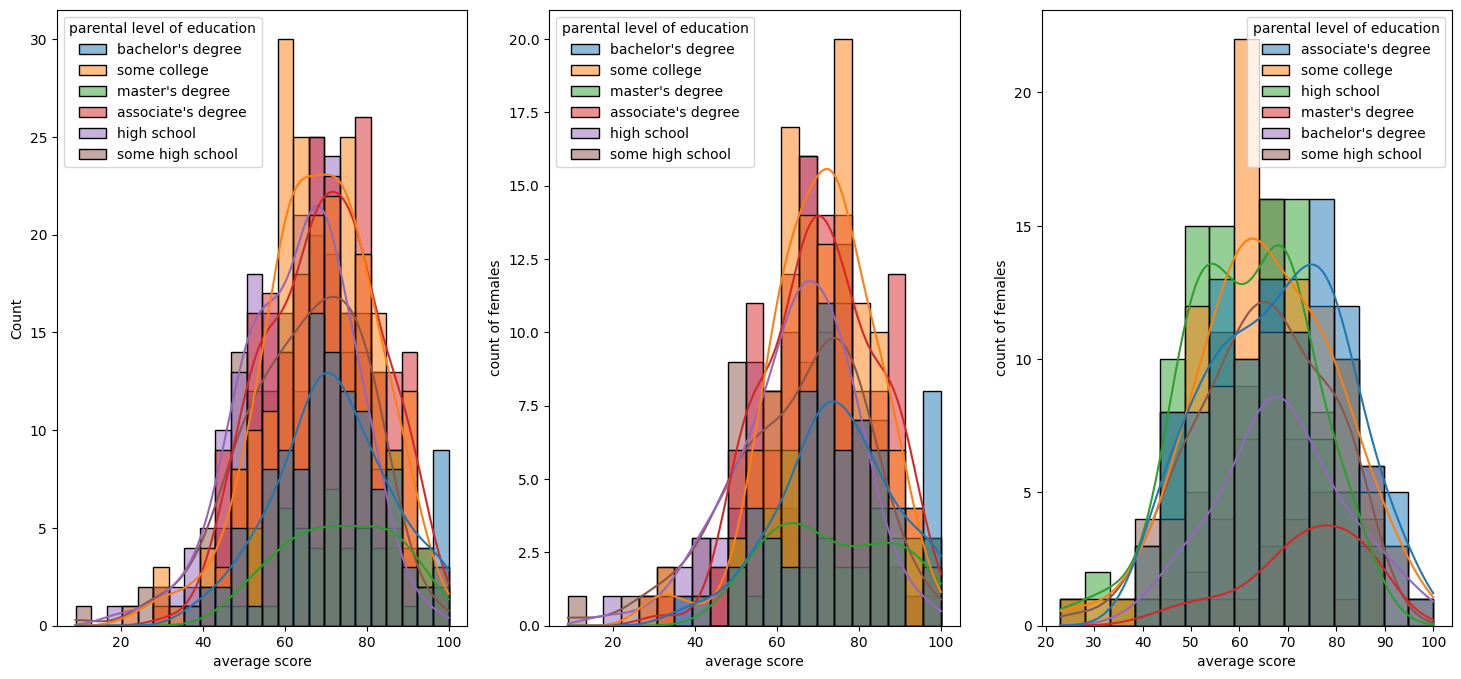

In [21]:
## on te basis of parental level of education
plt.figure(figsize=(18,8))
plt.subplot(1,3,1)
sns.histplot(data=df,x='average score',kde=True,hue='parental level of education')
plt.subplot(1,3,2)
sns.histplot(data=df[df.gender=='female'],x='average score',kde=True,hue='parental level of education')
plt.ylabel("count of females")
plt.subplot(1,3,3)
sns.histplot(data=df[df.gender=='male'],x='average score',kde=True,hue='parental level of education')
plt.ylabel("count of females")

### Insights


<Axes: xlabel='average score', ylabel='Count'>

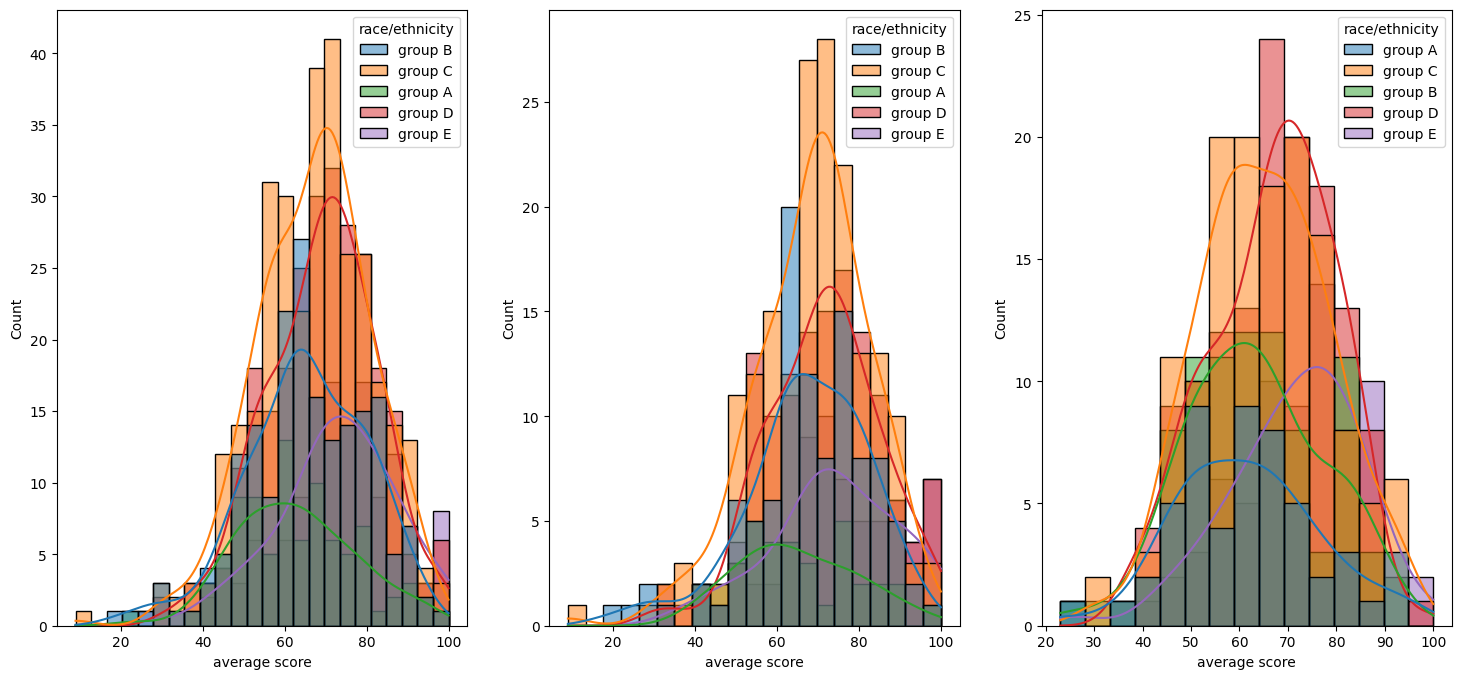

In [22]:
plt.figure(figsize=(18,8))
plt.subplot(1,3,1)
sns.histplot(data=df,x='average score',kde=True,hue='race/ethnicity')
plt.subplot(1,3,2)
sns.histplot(data=df[df.gender=='female'],x='average score',kde=True,hue='race/ethnicity')
plt.subplot(1,3,3)
sns.histplot(data=df[df.gender=='male'],x='average score',kde=True,hue='race/ethnicity')

### maximum score of students in all threee subjects

<Axes: ylabel='writing score'>

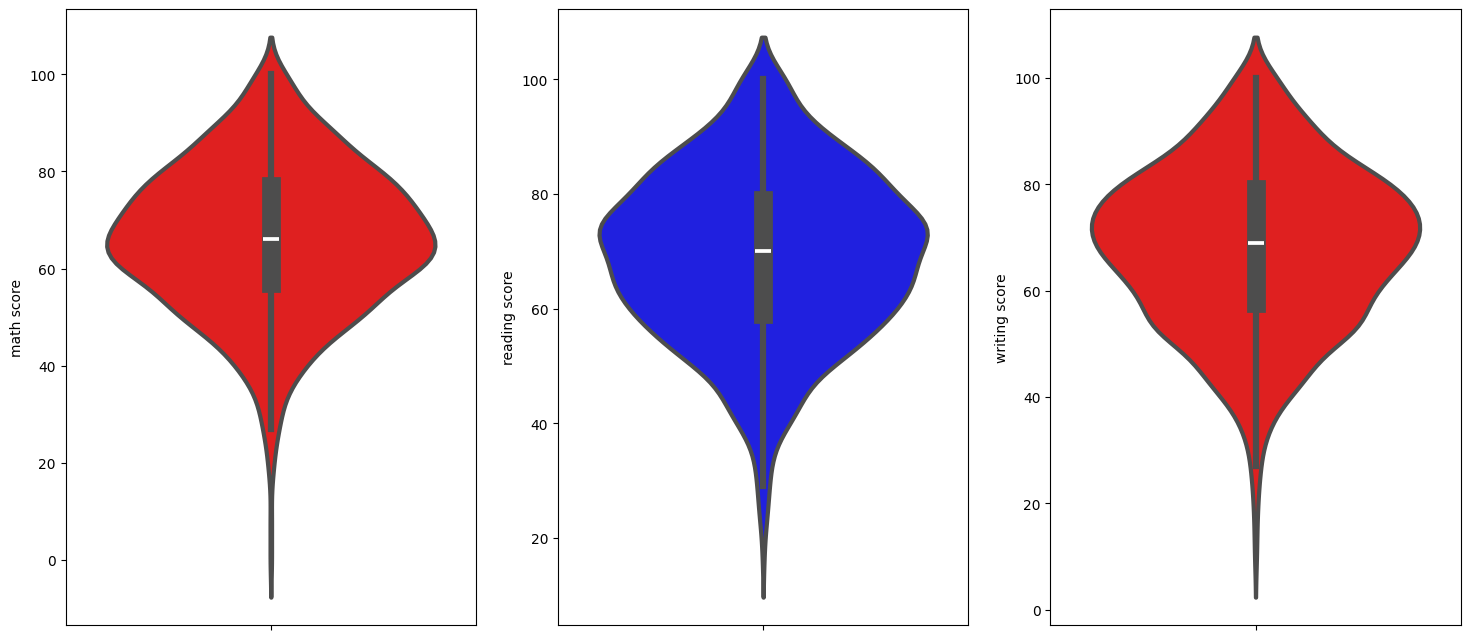

In [23]:
plt.figure(figsize=(18,8))
plt.subplot(1,3,1)
sns.violinplot(data=df,y='math score',color='red',linewidth=3)
plt.subplot(1,3,2)
sns.violinplot(data=df,y='reading score',color='blue',linewidth=3)
plt.subplot(1,3,3)
sns.violinplot(data=df,y='writing score',color='red',linewidth=3)

### Insights
#### it is clearly visible that most of the student score 60-80 marks in maths while most student score 50-80 marks in reading and writing

In [24]:
'''plt.figure(figsize=(18,8))
plt.subplot(1, 3, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']
plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1, 3, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
# plt.axis('off')
plt.subplot(1, 3, 3)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)'''
# plt.axis('off')


'plt.figure(figsize=(18,8))\nplt.subplot(1, 3, 1)\nsize = df[\'gender\'].value_counts()\nlabels = \'Female\', \'Male\'\ncolor = [\'red\',\'green\']\nplt.pie(size, colors = color, labels = labels,autopct = \'.%2f%%\')\nplt.title(\'Gender\', fontsize = 20)\nplt.axis(\'off\')\n\nplt.subplot(1, 3, 2)\nsize = df[\'race/ethnicity\'].value_counts()\nlabels = \'Group C\', \'Group D\',\'Group B\',\'Group E\',\'Group A\'\ncolor = [\'red\', \'green\', \'blue\', \'cyan\',\'orange\']\n\nplt.pie(size, colors = color,labels = labels,autopct = \'.%2f%%\')\nplt.title(\'Race/Ethnicity\', fontsize = 20)\n# plt.axis(\'off\')\nplt.subplot(1, 3, 3)\nsize = df[\'parental level of education\'].value_counts()\nlabels = \'Some College\', "Associate\'s Degree",\'High School\',\'Some High School\',"Bachelor\'s Degree","Master\'s Degree"\ncolor = [\'red\', \'green\', \'blue\', \'cyan\',\'orange\',\'grey\']\n\nplt.pie(size, colors = color,labels = labels,autopct = \'.%2f%%\')\nplt.title(\'Parental Education\', font

### checking outliers

<Axes: ylabel='average score'>

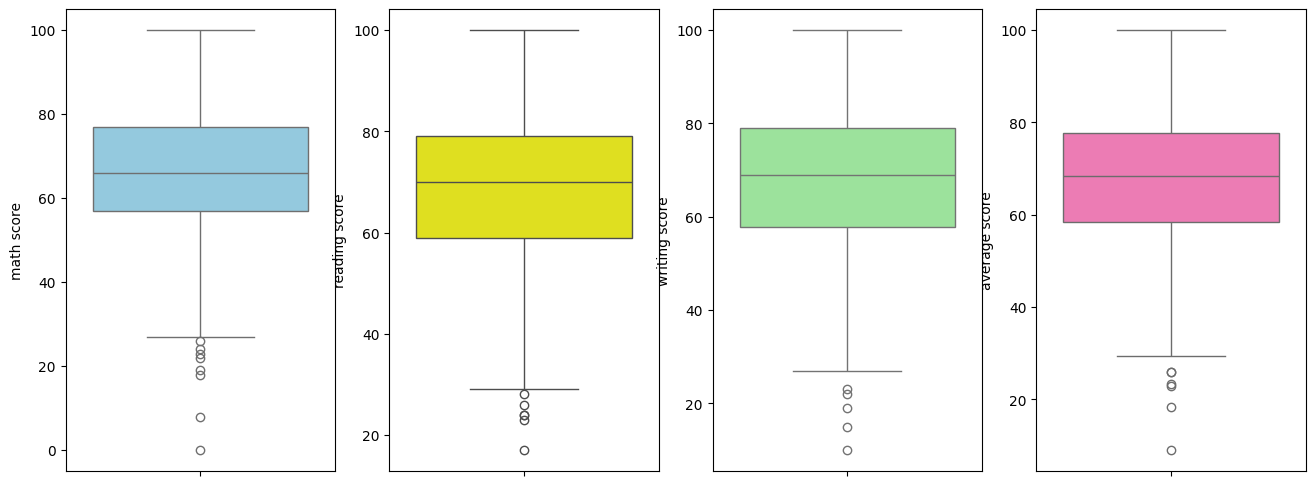

In [25]:
plt.figure(figsize=(16,6))
plt.subplot(1,4,1)
sns.boxplot(df['math score'],color='SkyBlue')
plt.subplot(1,4,2)
sns.boxplot(df['reading score'],color='yellow')
plt.subplot(1,4,3)
sns.boxplot(df['writing score'],color='lightgreen')
plt.subplot(1,4,4)
sns.boxplot(df['average score'],color='hotpink')

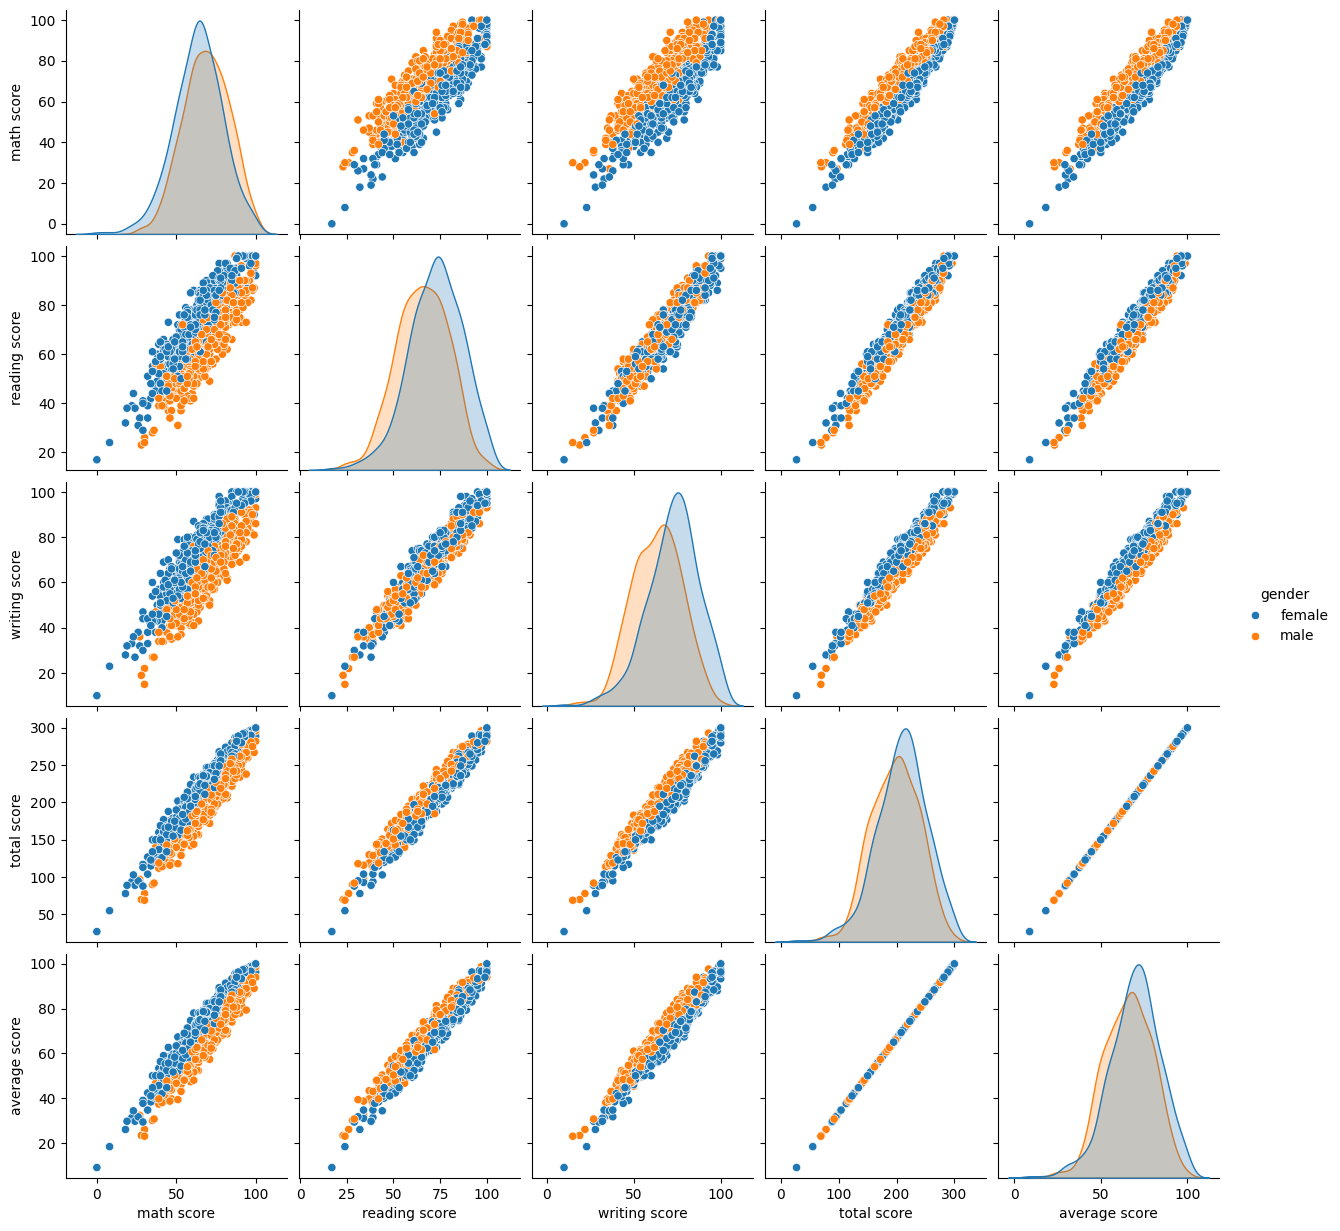

In [26]:
sns.pairplot(df,hue='gender')
plt.show()